In [1]:
#!pip install seaborn
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('../data/Admission_Predict.csv').drop(['Serial No.', 'University Rating', 'SOP', 'LOR ', 'Research'], axis=1)
df.head()

,GRE Score,TOEFL Score,CGPA,Chance of Admit
0,337,118,9.65,0.92
1,324,107,8.87,0.76
2,316,104,8.00,0.72
3,322,110,8.67,0.80
4,314,103,8.21,0.65


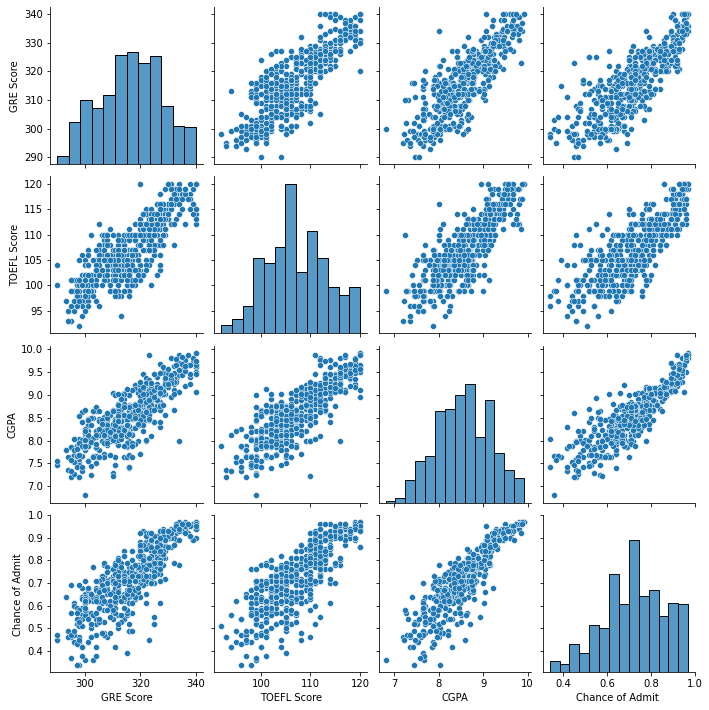

In [3]:
sns.pairplot(df)

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, **options)
    Split arrays or matrices into random train and test subsets
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        complement of the train size. If ``train_size`` is also Non

In [6]:
X = df[['GRE Score', 'TOEFL Score', 'CGPA']].values
y = df['Chance of Admit '].apply(lambda v: v*100).values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
X_train.shape

(350, 3)

In [9]:
X_test.shape

(150, 3)

## Normalize and Scale the Features
We dont want to let the model think that some features are more important...

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [12]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Create our Model

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [14]:
model = Sequential()

model.add(Dense(4, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))

In [15]:
help(model.compile)

Help on method compile in module tensorflow.python.keras.engine.training:

compile(optimizer='rmsprop', loss=None, metrics=None, loss_weights=None, weighted_metrics=None, run_eagerly=None, **kwargs) method of tensorflow.python.keras.engine.sequential.Sequential instance
    Configures the model for training.
    
    Arguments:
        optimizer: String (name of optimizer) or optimizer instance. See
          `tf.keras.optimizers`.
        loss: String (name of objective function), objective function or
          `tf.keras.losses.Loss` instance. See `tf.keras.losses`. An objective
          function is any callable with the signature `loss = fn(y_true,
          y_pred)`, where y_true = ground truth values with shape =
          `[batch_size, d0, .. dN]`, except sparse loss functions such as sparse
          categorical crossentropy where shape = `[batch_size, d0, .. dN-1]`.
          y_pred = predicted values with shape = `[batch_size, d0, .. dN]`. It
          returns a weighted loss

In [16]:
model.compile(optimizer='rmsprop', loss='mse')

In [17]:
model.fit(x=X_train, y=y_train, epochs=100, verbose=0)
model.summary()

[2021-08-29 01:03:36.472 tensorflow-2-3-gpu--ml-g4dn-xlarge-33edf42bcb5531c041d8b56553ba:836 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2021-08-29 01:03:36.496 tensorflow-2-3-gpu--ml-g4dn-xlarge-33edf42bcb5531c041d8b56553ba:836 INFO profiler_config_parser.py:102] Unable to find config at /opt/ml/input/config/profilerconfig.json. Profiler is disabled.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 16        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 28        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 79
Trai

<AxesSubplot:>

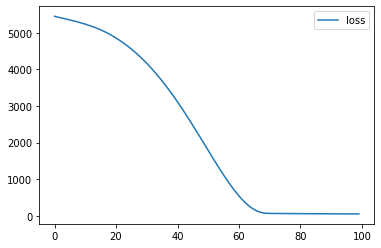

In [18]:
pd.DataFrame(model.history.history).plot()

## Model Evaluation
this is where we check the real-world performance of our model

In [19]:
model.evaluate(X_test, y_test, verbose=0)

63.5256233215332

In [20]:
model.evaluate(X_train, y_train, verbose=0)

52.50079345703125

In [22]:
test_predictions = model.predict(X_test)
test_predictions = pd.Series(test_predictions.reshape(150,))

actual_values = pd.DataFrame(y_test, columns=['Actual Y'])

In [24]:
actual_vs_model = pd.concat([actual_values, test_predictions], axis=1)
actual_vs_model.columns = ['Actual Y', 'Predicted']
actual_vs_model

,Actual Y,Predicted
0,93.0,96.085640
1,84.0,73.826668
2,39.0,64.466240
3,77.0,71.879860
4,74.0,84.933250
...,...,...
145,72.0,66.709000
146,95.0,99.863403
147,76.0,83.438164
148,71.0,63.910545


In [ ]:
sns.scatterplot()